In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
import time

In [10]:
marathon = pd.read_csv("./data/marathon_results_2017.csv", 
                        usecols=["Age","M/F","Country","40K"])
 
marathon['40K'] = marathon['40K'].replace('-',0)
marathon['40K'] = marathon['40K'].apply(pd.to_timedelta)
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
groupMF = marathon[ marathon["Country"].isin(["USA","CAN"]) ].groupby(by=["Country","M/F"])
groupMF = groupMF.agg({"TimeSeconds": ["mean"]})
groupMF = groupMF.unstack()
groupMF.columns = groupMF.columns.droplevel().droplevel()
groupMF

M/F,F,M
Country,,
CAN,13618.346012,12527.160190
USA,14187.362706,12998.130515


<Axes: xlabel='Country'>

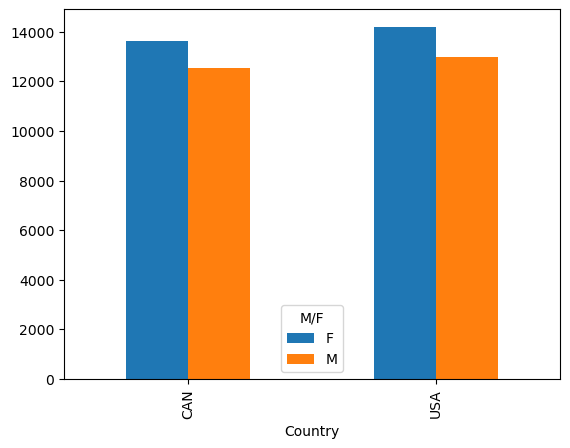

In [11]:
groupMF.plot(kind = 'bar')

<Axes: xlabel='Country'>

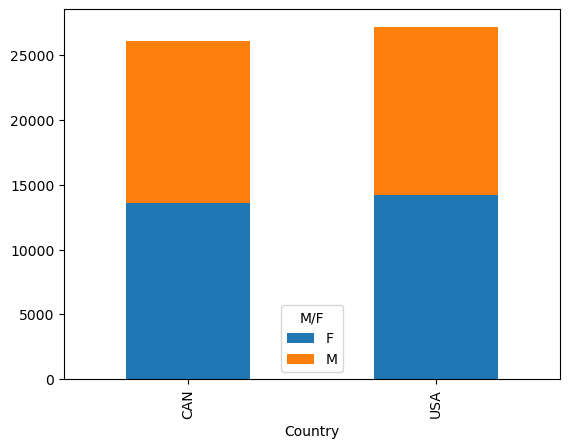

In [12]:
groupMF.plot(kind = 'bar',stacked=True)

<Axes: ylabel='Country'>

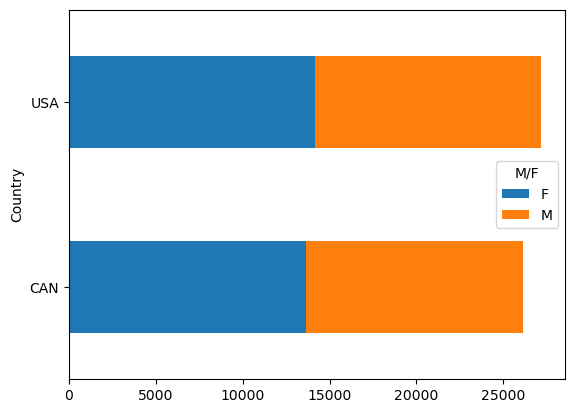

In [13]:
groupMF.plot(kind = 'barh',stacked=True)

In [14]:
age_data = marathon[marathon['Country'].isin(['USA'])]
age_data.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,0 days 02:03:14,7394.0
3,32,M,USA,0 days 02:04:35,7475.0
5,40,M,USA,0 days 02:05:21,7521.0
6,33,M,USA,0 days 02:05:41,7541.0
8,27,M,USA,0 days 02:07:17,7637.0


<Axes: ylabel='Frequency'>

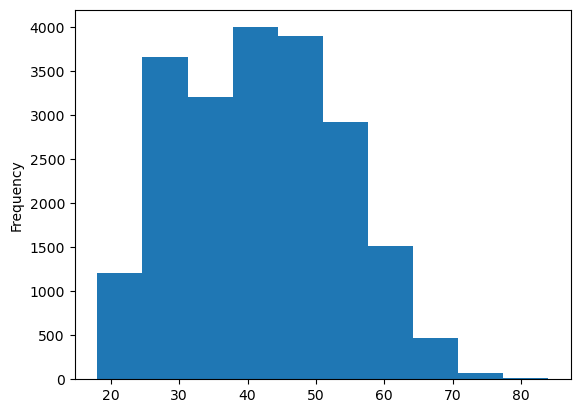

In [16]:
age_data['Age'].plot(kind='hist')

In [18]:
age_data['Age'].nunique()

66

<Axes: ylabel='Frequency'>

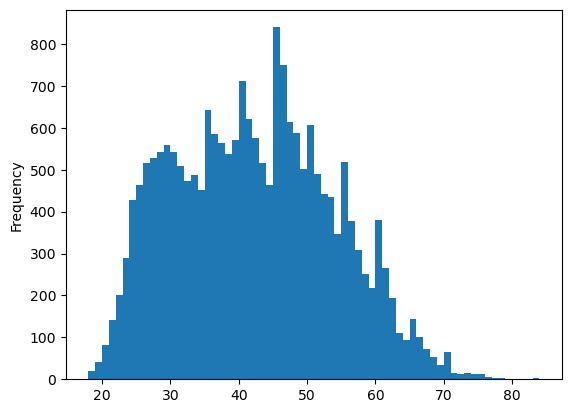

In [19]:
age_data['Age'].plot(kind='hist',bins=66)

In [20]:
data_USA = marathon[marathon['Country'].isin(['USA'])]
data_USA.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,0 days 02:03:14,7394.0
3,32,M,USA,0 days 02:04:35,7475.0
5,40,M,USA,0 days 02:05:21,7521.0
6,33,M,USA,0 days 02:05:41,7541.0
8,27,M,USA,0 days 02:07:17,7637.0


<Axes: >

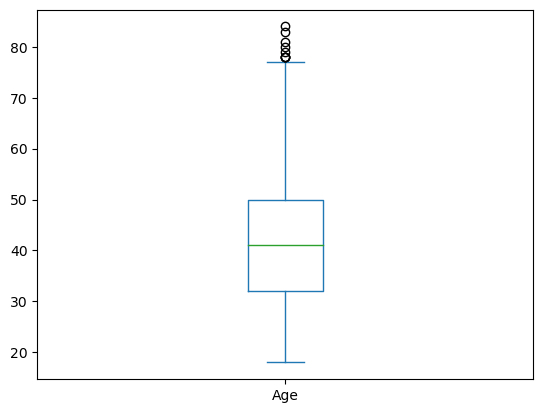

In [21]:
data_USA['Age'].plot(kind='box')

<Axes: >

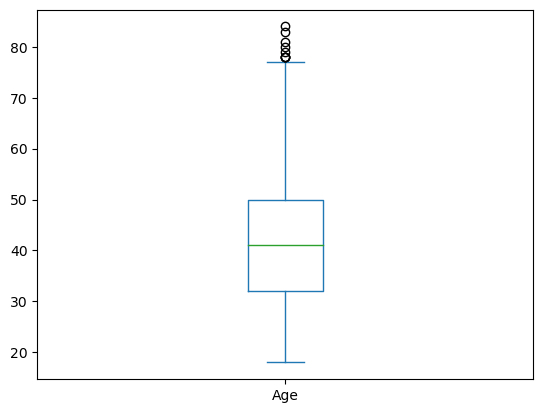

In [25]:
data_USA.plot(kind='box',y="Age")

In [22]:
USA = marathon[ marathon["Country"].isin(["USA"]) ]["Age"]
CAN = marathon[ marathon["Country"].isin(["CAN"]) ]["Age"]
df = pd.DataFrame({'USA':USA, 'CAN':CAN})
df.head()


,USA,CAN
1,30.0,NaN
3,32.0,NaN
5,40.0,NaN
6,33.0,NaN
8,27.0,NaN


<Axes: >

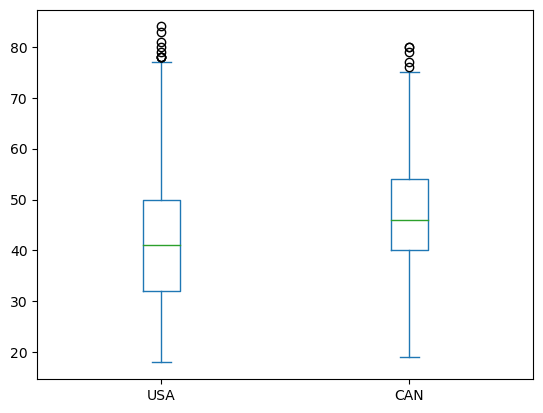

In [23]:
df.plot(kind='box')